In [1]:
#Import
import os
import pandas as pd
#!pip install xlrd
#!pip install openpyxl
import xlrd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Get data

In [2]:
print('Working directory')
os.chdir("/Users/katgood/Desktop/University/Syracuse/Term 2/IST 707")
print('is', os.getcwd())

Working directory
is /Users/katgood/Desktop/University/Syracuse/Term 2/IST 707


In [3]:
hash21=pd.read_excel('21hash.xlsx')

hash22=pd.read_excel('22hash.xlsx')

hashEg=pd.read_excel('everhash.xlsx')

display(hashEg.sample(10))

,authorMeta/fans,authorMeta/heart,authorMeta/id,authorMeta/name,authorMeta/verified,authorMeta/video,commentCount,createTimeISO,diggCount,hashtags/0/name,...,hashtags/4/name,hashtags/5/name,hashtags/6/name,hashtags/7/name,hashtags/8/name,hashtags/9/name,hashtags/10/name,playCount,shareCount,videoMeta/duration
6164,1300000,16900000,6623350109545906181,oliverthepotter,False,195,6629,2020-07-10T00:23:53.000Z,1600000,fashion,...,ikeepmyshirton,NaN,NaN,NaN,NaN,NaN,NaN,7800000,11200,10
5798,215100,11100000,7001202647479157761,tiktok_fashion_show,False,231,81100,2021-11-04T12:27:47.000Z,3500000,runway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26600000,56400,23
127,13400000,331100000,4322816,noeminikita,True,331,24500,2022-04-14T17:29:35.000Z,7100000,foryou,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160300000,13700,25
3751,448600,9800000,7019994131351487493,minecraftnoob900,False,290,19100,2022-07-16T18:43:35.000Z,5800000,minecraft,...,viral,gamer,foryou,fyp,fypシ,foryoupage,minecraftnoob900,49100000,24300,36
3801,1700000,29900000,6770042486863414278,treinadorkaka,True,223,76800,2020-09-11T01:37:03.000Z,6400000,tiktokfamous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83400000,619800,8
5771,27400000,214300000,142565009246584832,marshmello,True,447,46200,2020-08-19T20:07:53.000Z,4600000,fashion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30800000,101400,7
1870,1600000,48300000,6969739497836938246,sean_exotic,False,341,87600,2021-10-18T21:42:28.000Z,13600000,jaguar,...,fyp,foryou,foryoupage,NaN,NaN,NaN,NaN,101600000,142900,15
3440,13200000,438200000,6983289086387782661,ideatimes,False,1475,21000,2022-11-02T14:59:25.000Z,6800000,viral,...,kitchen,kitchenhacks,useful,cleantok,ideatimes,viral,fypシ,111200000,151700,24
1326,992000,39600000,6557832416546308101,nicolettelifts,False,305,50900,2022-10-07T19:08:53.000Z,11500000,micahelbjordan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48800000,64300,43
5799,1400000,16300000,7175248857513772078,kenstyle.chinese,False,161,15000,2023-01-01T03:39:53.000Z,3400000,fashionstyles,...,foryoupage,fashionstreet,NaN,NaN,NaN,NaN,NaN,79100000,21900,24


# Clean Data

## Check data types

In [4]:
print('hash21/n', hash21.dtypes)

hash21/n authorMeta/fans         int64
authorMeta/heart        int64
authorMeta/id           int64
authorMeta/name        object
authorMeta/verified      bool
authorMeta/video        int64
commentCount            int64
createTimeISO          object
diggCount               int64
hashtags/0/name        object
hashtags/1/name        object
hashtags/2/name        object
hashtags/3/name        object
hashtags/4/name        object
hashtags/5/name        object
hashtags/6/name        object
hashtags/7/name        object
hashtags/8/name        object
hashtags/9/name        object
hashtags/10/name       object
playCount               int64
shareCount              int64
videoMeta/duration      int64
dtype: object


In [5]:
print('hash22/n', hash22.dtypes)

hash22/n authorMeta/fans         int64
authorMeta/heart        int64
authorMeta/id           int64
authorMeta/name        object
authorMeta/verified      bool
authorMeta/video        int64
commentCount            int64
createTimeISO          object
diggCount               int64
hashtags/0/name        object
hashtags/1/name        object
hashtags/2/name        object
hashtags/3/name        object
hashtags/4/name        object
hashtags/5/name        object
hashtags/6/name        object
hashtags/7/name        object
hashtags/8/name        object
hashtags/9/name        object
hashtags/10/name       object
playCount               int64
shareCount              int64
videoMeta/duration      int64
dtype: object


In [6]:
print('hashEg/n', hashEg.dtypes)

hashEg/n authorMeta/fans         int64
authorMeta/heart        int64
authorMeta/id           int64
authorMeta/name        object
authorMeta/verified      bool
authorMeta/video        int64
commentCount            int64
createTimeISO          object
diggCount               int64
hashtags/0/name        object
hashtags/1/name        object
hashtags/2/name        object
hashtags/3/name        object
hashtags/4/name        object
hashtags/5/name        object
hashtags/6/name        object
hashtags/7/name        object
hashtags/8/name        object
hashtags/9/name        object
hashtags/10/name       object
playCount               int64
shareCount              int64
videoMeta/duration      int64
dtype: object


## Change authorMeta/id into a string, since it is not really a number

In [7]:
def convertIdCol(df):
    df['authorMeta/id'] = df['authorMeta/id'].astype(str)
    return df

In [8]:
hash21=convertIdCol(hash21)
hash22=convertIdCol(hash22)
hashEg=convertIdCol(hashEg)

## Make createTimeISO Python readable

In [9]:
def convertTime(timestr):
    return datetime.strptime(timestr, "%Y-%m-%dT%H:%M:%S.%fZ")

def convertTimeCol(df):
    df['createTimeISO']=df['createTimeISO'].apply(lambda x: convertTime(x))
    return df

hash21=convertTimeCol(hash21)
hash22=convertTimeCol(hash22)
hashEg=convertTimeCol(hashEg)

In [10]:
hashEg['createTimeISO'].sample(3)

4091   2021-05-26 14:56:38
3792   2021-03-10 06:02:24
91     2021-06-06 11:17:46
Name: createTimeISO, dtype: datetime64[ns]

## Remove videos from irrelevant years for all three files    

In [11]:
def checkDate(df):
    minTime=df['createTimeISO'].min()
    maxTime=df['createTimeISO'].max()
    return minTime, maxTime

print('2021?', checkDate(hash21))
print('2022?', checkDate(hash22))
print('2021-2022?', checkDate(hashEg))

2021? (Timestamp('2016-04-11 12:50:51'), Timestamp('2023-03-22 20:19:28'))
2022? (Timestamp('2018-11-07 13:08:43'), Timestamp('2023-03-23 22:53:50'))
2021-2022? (Timestamp('2018-05-12 07:23:30'), Timestamp('2023-03-21 22:39:36'))


In [12]:
def correctDate(df, startDate, endDate):
    startDate = pd.to_datetime(startDate)
    endDate = pd.to_datetime(endDate)
    dfnew = df[(df['createTimeISO'] >= startDate) & (df['createTimeISO'] <= endDate)]
    return dfnew

hash21=correctDate(hash21, '2021-01-01', '2021-12-31')
hash22=correctDate(hash22, '2022-01-01', '2022-12-31')
hashEg=correctDate(hashEg, '2021-01-01', '2022-12-31')

In [13]:
def verifyDate(df):
    samp=df.sample(3)[['createTimeISO']]
    chec=checkDate(df)
    return samp, chec

print(verifyDate(hash21))
print(verifyDate(hash22))
print(verifyDate(hashEg))

(           createTimeISO
3990 2021-04-16 20:57:29
4150 2021-02-01 23:49:07
2623 2021-01-04 17:54:15, (Timestamp('2021-01-01 02:44:00'), Timestamp('2021-12-30 22:28:47')))
(           createTimeISO
2122 2022-04-24 17:42:27
2190 2022-05-15 17:23:30
2740 2022-04-26 18:20:16, (Timestamp('2022-01-01 13:58:04'), Timestamp('2022-12-29 23:32:44')))
(           createTimeISO
4611 2022-06-07 13:38:26
4725 2021-10-18 21:52:15
2165 2021-07-03 10:27:44, (Timestamp('2021-01-01 03:35:01'), Timestamp('2022-12-30 23:54:51')))


In [14]:
def dataSize(df):
    return df.shape

In [15]:
print(dataSize(hash21))
print(dataSize(hash22))
print(dataSize(hashEg))

(3804, 23)
(6102, 23)
(5146, 23)


## Check for nulls in integer and datetime columns. Nulls in object or boolean columns are fine.

In [16]:
def check4Nulls(df):
    nullnum=df[['authorMeta/fans', 'authorMeta/heart','commentCount', 'createTimeISO', 'diggCount','playCount', 'shareCount', 'videoMeta/duration']].isnull().sum()
    return nullnum

In [17]:
print(check4Nulls(hash21))
print(check4Nulls(hash22))
print(check4Nulls(hashEg))

authorMeta/fans       0
authorMeta/heart      0
commentCount          0
createTimeISO         0
diggCount             0
playCount             0
shareCount            0
videoMeta/duration    0
dtype: int64
authorMeta/fans       0
authorMeta/heart      0
commentCount          0
createTimeISO         0
diggCount             0
playCount             0
shareCount            0
videoMeta/duration    0
dtype: int64
authorMeta/fans       0
authorMeta/heart      0
commentCount          0
createTimeISO         0
diggCount             0
playCount             0
shareCount            0
videoMeta/duration    0
dtype: int64


## Remove all playCount=0

In [18]:
def noZeros(df):
    df=df[df['playCount']!=0]
    return df

hash21=noZeros(hash21)
hash22=noZeros(hash22)
hashEg=noZeros(hashEg)

print(dataSize(hash21))
print(dataSize(hash22))
print(dataSize(hashEg))

(3794, 23)
(6097, 23)
(5102, 23)


## Hashtag Emotional Polarity

In [19]:
analyzer=SentimentIntensityAnalyzer()

def getSentiment(text):
    if isinstance(text, str):
        sentiment=analyzer.polarity_scores(text)
    else:
        sentiment={'compound':0}
    return sentiment['compound']

def avgSentimentCol(df):
    hashCols=['hashtags/0/name', 'hashtags/1/name', 'hashtags/2/name', 'hashtags/3/name', 'hashtags/4/name', 'hashtags/5/name', 'hashtags/6/name', 'hashtags/7/name', 'hashtags/8/name', 'hashtags/9/name', 'hashtags/10/name']
    for column in hashCols:
        df[column + '_sentiment']=df[column].apply(getSentiment)
    sentCols = [col for col in df.columns if col.endswith('_sentiment')]
    df['avgSentiment']=df[sentCols].mean(axis=1, numeric_only=True)
    return df

In [20]:
hash21=avgSentimentCol(hash21)
hash22=avgSentimentCol(hash22)
hashEg=avgSentimentCol(hashEg)
display(hashEg.sample(5))

,authorMeta/fans,authorMeta/heart,authorMeta/id,authorMeta/name,authorMeta/verified,authorMeta/video,commentCount,createTimeISO,diggCount,hashtags/0/name,...,hashtags/2/name_sentiment,hashtags/3/name_sentiment,hashtags/4/name_sentiment,hashtags/5/name_sentiment,hashtags/6/name_sentiment,hashtags/7/name_sentiment,hashtags/8/name_sentiment,hashtags/9/name_sentiment,hashtags/10/name_sentiment,avgSentiment
4548,5300000,90300000,6770613250847278085,yungaaronn,False,501,7722,2021-12-18 00:21:36,4600000,fyp,...,0.4404,0.3612,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.072873
1333,2900000,36700000,6885034024763769861,foodie.beats,False,453,36900,2021-01-14 12:58:56,11400000,chocolate,...,0.0000,0.0000,0.0,0.0,0.4588,0.0,0.0,0.0,0.0,0.086609
456,796900,16400000,7137330593776632874,wasp.video,False,298,15100,2022-10-15 15:40:03,4300000,fyp,...,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000
6142,24900,6800000,7028561071234614277,florence.mcneill,False,311,1942,2022-11-14 22:18:41,1700000,archivefashion,...,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000
5912,2200000,27000000,6918899105096156161,panjan0415,True,47,8006,2021-09-04 03:34:49,2400000,makeup,...,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000


## The Viral Attribute: Identifying Extreme Outliers

In [21]:
def hiOutliers(df, threshold=4):
    playMean=np.mean(df['playCount'])
    playStdev=np.std(df['playCount'])
    upBound=playMean + threshold * playStdev
    hiOutLoc=np.where(df['playCount'] > upBound)
    howMany=len(hiOutLoc[0])
    return howMany, len(df['playCount'])

print(hiOutliers(hash21))
print(hiOutliers(hash22))
print(hiOutliers(hashEg))

(38, 3794)
(62, 6097)
(55, 5102)


In [22]:
def labelViral(df, threshold=4):
    playMean=np.mean(df['playCount'])
    playStdev=np.std(df['playCount'])
    upBound=playMean + threshold * playStdev
    df['viral']=df['playCount']>upBound
    df['viral'] = df['viral'].map({True: 'Yes', False: 'No'})
    return df

In [23]:
hash21=labelViral(hash21)
hash22=labelViral(hash22)
hashEg=labelViral(hashEg)

# Analysis

In [24]:
print(dataSize(hash21))
print(dataSize(hash22))
print(dataSize(hashEg))

(3794, 36)
(6097, 36)
(5102, 36)


## Visualizations

In [25]:
def PlotPlays(df, title):
    plt.yscale('symlog', linthresh=1)
    sns.scatterplot(data=df, x='createTimeISO', y='playCount', marker='+')
    plt.xlabel('Create Time')
    plt.xticks(rotation=45)
    plt.ylabel('Play Count')
    plt.title(title)
    plt.grid(True)
    #plt.show()

In [26]:
def histPlays(df, title):
    plt.xscale('symlog', linthresh=1)
    sns.histplot(df['playCount'], kde=True)
    plt.xlabel('Play Count')
    plt.ylabel('Frequency')
    plt.title(title)
   # plt.show()

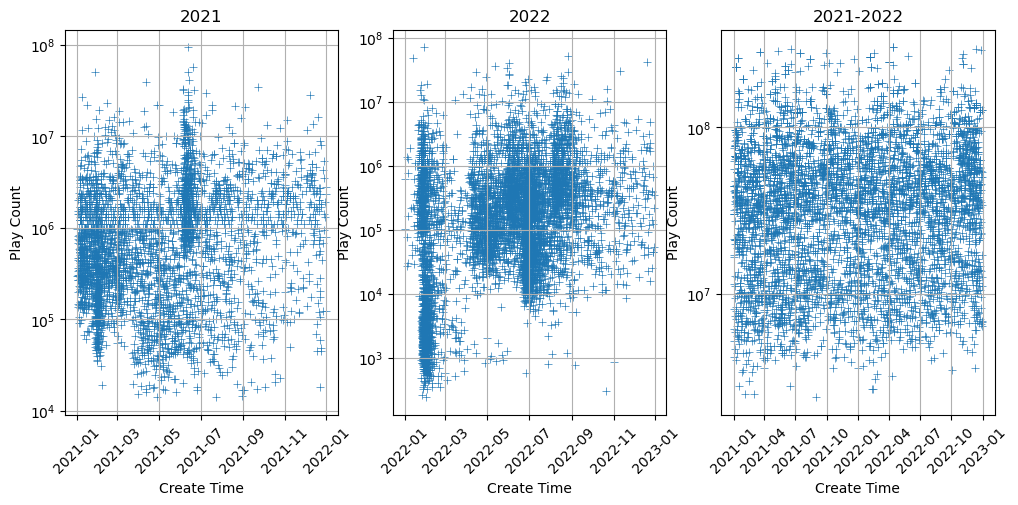

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1,3,1)
PlotPlays(hash21, '2021')

plt.subplot(1,3,2)
PlotPlays(hash22, '2022')

plt.subplot(1,3,3)
PlotPlays(hashEg, '2021-2022')

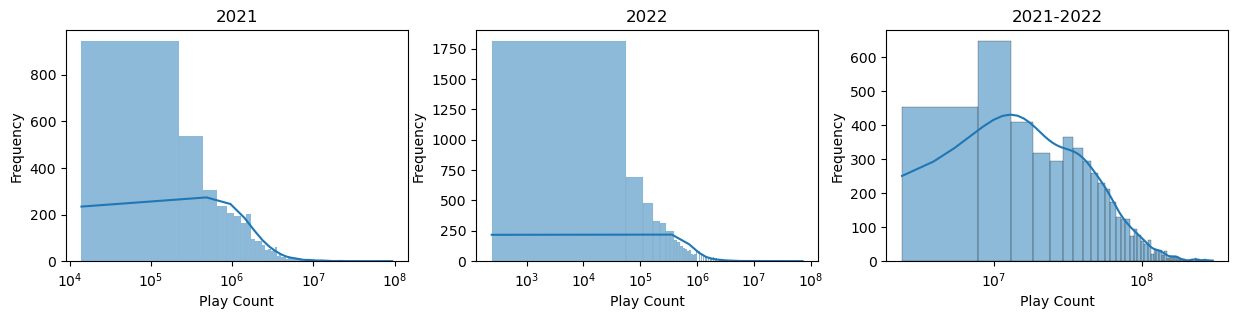

In [28]:
plt.figure(figsize=(15, 3)) 

plt.subplot(1,3,1)
histPlays(hash21, '2021')

plt.subplot(1,3,2)
histPlays(hash22, '2022')

plt.subplot(1,3,3)
histPlays(hashEg, '2021-2022')

## Predicting Virality

In [29]:
def logReg(df):
    X=df[['authorMeta/fans', 'authorMeta/video', 'commentCount', 'diggCount', 'shareCount', 'videoMeta/duration', 'avgSentiment']]
    y=df['viral']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model=LogisticRegression()
    model.fit(X_train, y_train)
    vPredict=model.predict(X_test)
    accuScore=accuracy_score(y_test, vPredict)
    confMatrix=confusion_matrix(y_test, vPredict)
    classReport=classification_report(y_test, vPredict)
    modelCo = model.coef_[0]
    sortedCo= sorted(list(zip(X_train.columns, modelCo)), key=lambda x: abs(x[1]), reverse=True)
    print("Accuracy Score:", accuScore)
    print("\nConfusion Matrix:\n", confMatrix)
    print("\nClassification Report:\n", classReport)
    print(sortedCo)

In [30]:
print('2021')
logReg(hash21)
print('2022')
logReg(hash22)
print('2021-2022')
logReg(hashEg)

2021
Accuracy Score: 0.9749670619235836

Confusion Matrix:
 [[736  15]
 [  4   4]]

Classification Report:
               precision    recall  f1-score   support

          No       0.99      0.98      0.99       751
         Yes       0.21      0.50      0.30         8

    accuracy                           0.97       759
   macro avg       0.60      0.74      0.64       759
weighted avg       0.99      0.97      0.98       759

[('authorMeta/video', -0.021288410527652485), ('videoMeta/duration', -0.0015552459988564154), ('commentCount', 1.921468196612347e-05), ('shareCount', -1.2409715989085114e-05), ('diggCount', 5.812988430422864e-07), ('avgSentiment', -4.132265957902436e-07), ('authorMeta/fans', 1.1613353586448394e-07)]
2022
Accuracy Score: 0.9729508196721312

Confusion Matrix:
 [[1178   29]
 [   4    9]]

Classification Report:
               precision    recall  f1-score   support

          No       1.00      0.98      0.99      1207
         Yes       0.24      0.69      0.35

In [31]:
def viralBar(df, col, title):
    myColors = {"Yes": "green", "No": "red"}
    sns.barplot(x=df[col], y=df['viral'], data=df, orient='h', palette=myColors, order=['Yes', 'No'])
    plt.xlabel(col)
    plt.ylabel('Viral Video')
    plt.title(title)

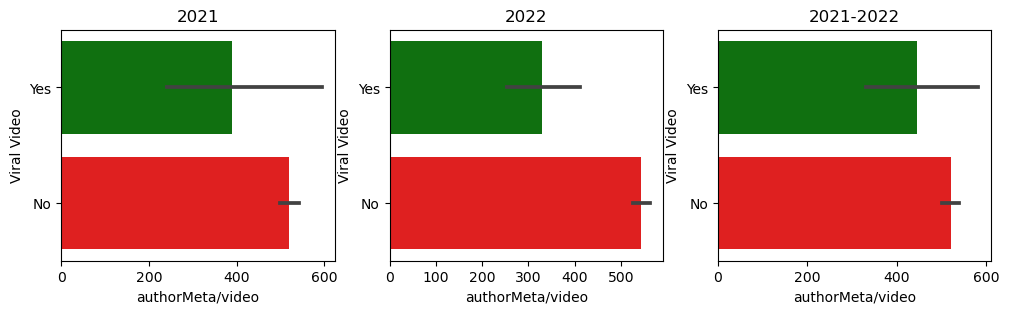

In [32]:
plt.figure(figsize=(12, 3))

plt.subplot(1,3,1)
viralBar(hash21, 'authorMeta/video', '2021')

plt.subplot(1,3,2)
viralBar(hash22, 'authorMeta/video', '2022')

plt.subplot(1,3,3)
viralBar(hashEg, 'authorMeta/video', '2021-2022')

## Predicting playCount

In [33]:
def linReg(df):
    X = df[['authorMeta/fans', 'authorMeta/heart', 'commentCount', 'diggCount', 'shareCount','videoMeta/duration', 'avgSentiment']]
    Y = df['playCount']  # Replace with your actual dependent variable
    model = LinearRegression() 
    model.fit(X, Y)
    coef = model.coef_.tolist()
    intercept = model.intercept_
    for item in coef:
        print(item)
    print("Intercept:", intercept)

In [34]:
print('2021')
linReg(hash21)
print('2022')
linReg(hash22)
print('2021-2022')
linReg(hashEg)

2021
0.08758652223617971
-0.0016183563747644695
-13.655703665578942
5.850290109404121
9.463475734640019
-3395.9044634632387
13643.249668554996
Intercept: 249048.04176084208
2022
0.028002300663810833
0.0009917225017550858
57.11182981218694
6.869119309908955
-0.5978074244555798
-1067.7780936016784
-185393.64047087077
Intercept: 119150.47676174843
2021-2022
0.9813001660732623
-0.023413442828799567
-29.78595691073866
7.522130401259028
15.720001058429403
44729.785669594865
15294650.953356761
Intercept: -1790741.1366804317


In [35]:
def vsPlay(df, col, title):
    plt.xscale('symlog', linthresh=1)
    plt.yscale('symlog', linthresh=1)
    sns.scatterplot(data=df, x= col, y='playCount', marker='+')
    plt.xlabel('Play Count')
    plt.title(title)
    plt.ylabel(col)
    #plt.show()

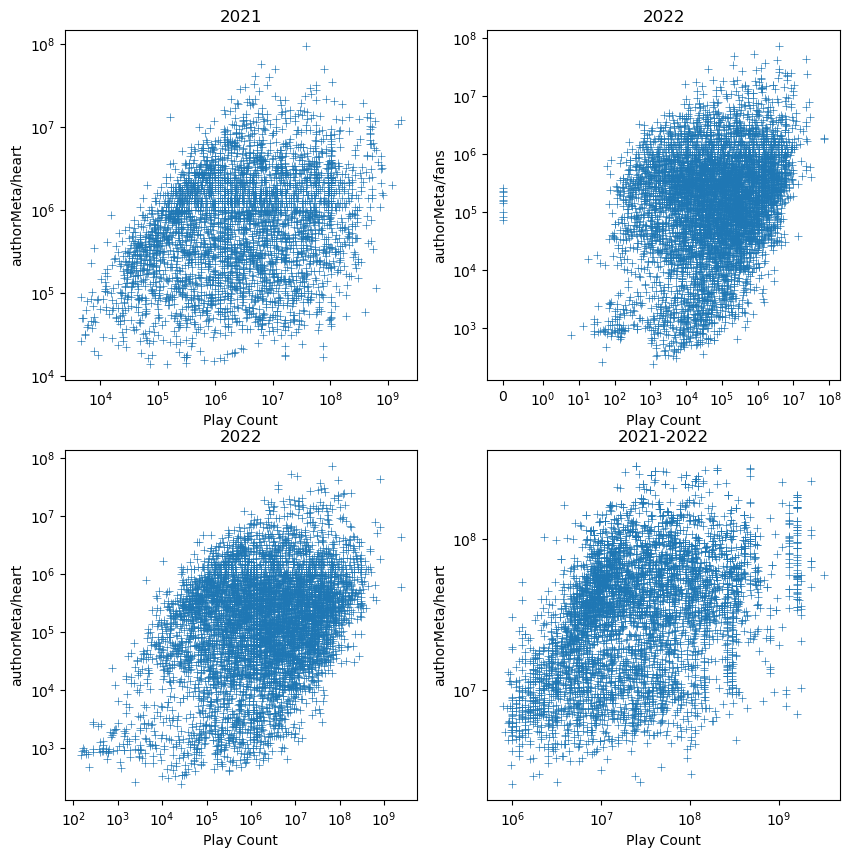

In [36]:
plt.figure(figsize=(10, 10)) 

plt.subplot(2,2,1)
vsPlay(hash21, 'authorMeta/heart', '2021')

plt.subplot(2,2,2)
vsPlay(hash22, 'authorMeta/fans', '2022')

plt.subplot(2,2,3)
vsPlay(hash22, 'authorMeta/heart', '2022')

plt.subplot(2,2,4)
vsPlay(hashEg, 'authorMeta/heart', '2021-2022')

### On my computer, I can run this from start to finish without any errors. Yay!